In [ ]:
import pandas as pd
import numpy as np


Прочитайте файл 2017_jun_final.csv за допомогою методу read_csv

In [14]:
path = "/content/2017_jun_final.csv"
df = pd.read_csv(path)

Прочитайте отриману таблицю, використовуючи метод head


In [15]:
df.head()

,N,Должность,Язык.программирования,Специализация,Общий.опыт.работы,Опыт.работы.на.текущем.месте,Зарплата.в.месяц,Изменение.зарплаты.за.12.месяцев,Город,Размер.компании,...,Еще.студент,Уровень.английского,Предметная.область,Дата.заполнения,User.Agent,exp,current_job_exp,salary,Валюта,cls
0,1,Junior QA engineer,NaN,Manual QA,0.5,0.5,400,0,Харьков,до 10 человек,...,True,ниже среднего,"iOS,eCommerce",12/06/2017 12:38:08,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,0.5,0.5,400,NaN,QA
1,2,Junior QA engineer,NaN,Manual QA,меньше 3 месяцев,меньше 3 месяцев,430,130,Харьков,свыше 1000 человек,...,True,выше среднего,Веб-разработка,12/06/2017 12:42:51,Mozilla/5.0 (iPad; CPU OS 10_2_1 like Mac OS X...,0.0,0.0,430,NaN,QA
2,3,Software Engineer,C#/.NET,NaN,4,1,2500,800,Киев,до 1000 человек,...,False,средний,"Веб-разработка,Корпоративные системы",12/06/2017 13:02:47,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,4.0,1.0,2500,NaN,DEV
3,4,Software Engineer,JavaScript,NaN,5,4,2000,400,Одесса,до 200 человек,...,False,ниже среднего,"Desktop Applications,Веб-разработка",12/06/2017 13:03:01,Mozilla/5.0 (Windows NT 6.1; Win64; x64) Apple...,5.0,4.0,2000,NaN,DEV
4,5,Senior Software Engineer,JavaScript,NaN,10 и более лет,0.5,4500,500,Другой,до 10 человек,...,False,средний,"Desktop Applications,Веб-разработка",12/06/2017 13:03:47,Mozilla/5.0 (iPhone; CPU iPhone OS 10_3_2 like...,10.0,0.5,4500,NaN,DEV


Визначте розмір таблиці за допомогою методу shape


In [16]:
df.shape

(8704, 25)

Визначте типи всіх стовпців за допомогою dataframe.dtypes


In [ ]:
df.dtypes

N                                     int64
Должность                            object
Язык.программирования                object
Специализация                        object
Общий.опыт.работы                    object
Опыт.работы.на.текущем.месте         object
Зарплата.в.месяц                      int64
Изменение.зарплаты.за.12.месяцев      int64
Город                                object
Размер.компании                      object
Тип.компании                         object
Пол                                  object
Возраст                               int64
Образование                          object
Университет                          object
Еще.студент                            bool
Уровень.английского                  object
Предметная.область                   object
Дата.заполнения                      object
User.Agent                           object
exp                                 float64
current_job_exp                     float64
salary                          

Порахуйте, яка частка пропусків міститься в кожній колонці (використовуйте методи isnull та sum)


In [ ]:
for column in df.columns:
    missing_percentage = df[column].isnull().sum() / df.shape[0]
    if missing_percentage:
      print(f"Колонка '{column}': {missing_percentage:.1%}")


Колонка 'Язык.программирования': 44.2%
Колонка 'Специализация': 82.9%
Колонка 'Университет': 4.1%
Колонка 'Предметная.область': 2.6%
Колонка 'Валюта': 99.9%
Колонка 'cls': 18.1%


Видаліть усі стовпці з пропусками, крім стовпця "Мова програмування"


In [ ]:
for column in df.columns:
    missing_percentage = df[column].isnull().sum() / df.shape[0]
    if missing_percentage and column != 'Язык.программирования':
      del df[column]

Знову порахуйте, яка частка пропусків міститься в кожній колонці і переконайтеся, що залишився тільки стовпець "Мова.програмування"


In [ ]:
for column in df.columns:
    missing_percentage = df[column].isnull().sum() / df.shape[0]
    if missing_percentage:
      print(f"Колонка '{column}': {missing_percentage:.1%}")


Колонка 'Язык.программирования': 44.2%


Видаліть усі рядки у вихідній таблиці за допомогою методу dropna


In [ ]:
df_res = df
df.dropna(axis=0)


NameError: ignored

Визначте новий розмір таблиці за допомогою методу shape


In [ ]:
df.shape

(8704, 20)

Створіть нову таблицю python_data, в якій будуть тільки рядки зі спеціалістами, які вказали мову програмування Python



In [ ]:
python_data = df.loc[df['Язык.программирования'] == 'Python']


Визначте розмір таблиці python_data за допомогою методу shape


In [ ]:
python_data.shape

(207, 20)

Використовуючи метод groupby, виконайте групування за стовпчиком "Посада"


In [ ]:
python_data = python_data.groupby('Должность')

Створіть новий DataFrame, де для згрупованих даних за стовпчиком "Посада", виконайте агрегацію даних за допомогою методу agg і знайдіть мінімальне та максимальне значення у стовпчику "Зарплата.в.місяць"


In [ ]:
new_df = python_data.agg({'Зарплата.в.месяц': ['min', 'max']})

print(new_df)

                         Зарплата.в.месяц      
                                      min   max
Должность                                      
Junior Software Engineer              100  1250
Senior Software Engineer             1300  9200
Software Engineer                     500  5400
System Architect                     3000  5000
Technical Lead                       1425  6200


Створіть функцію fill_avg_salary, яка повертатиме середнє значення заробітної плати на місяць. Використовуйте її для методу apply та створіть новий стовпчик "avg"


In [ ]:
def fill_avg_salary(row):
  return np.average([row['Зарплата.в.месяц']['min'], row['Зарплата.в.месяц']['max']])

new_df['avg'] = new_df.apply(fill_avg_salary, axis=1)


In [ ]:
new_df

Зарплата.в.месяц           avg
                                      min   max        
Должность                                              
Junior Software Engineer              100  1250   675.0
Senior Software Engineer             1300  9200  5250.0
Software Engineer                     500  5400  2950.0
System Architect                     3000  5000  4000.0
Technical Lead                       1425  6200  3812.5

Створіть описову статистику за допомогою методу describe для нового стовпчика.


In [ ]:
print(new_df['avg'].describe())


count       5.000000
mean     3337.500000
std      1700.091909
min       675.000000
25%      2950.000000
50%      3812.500000
75%      4000.000000
max      5250.000000
Name: avg, dtype: float64


Збережіть отриману таблицю в CSV файл


In [ ]:
new_df.to_csv('salary_stats.csv', index=True)


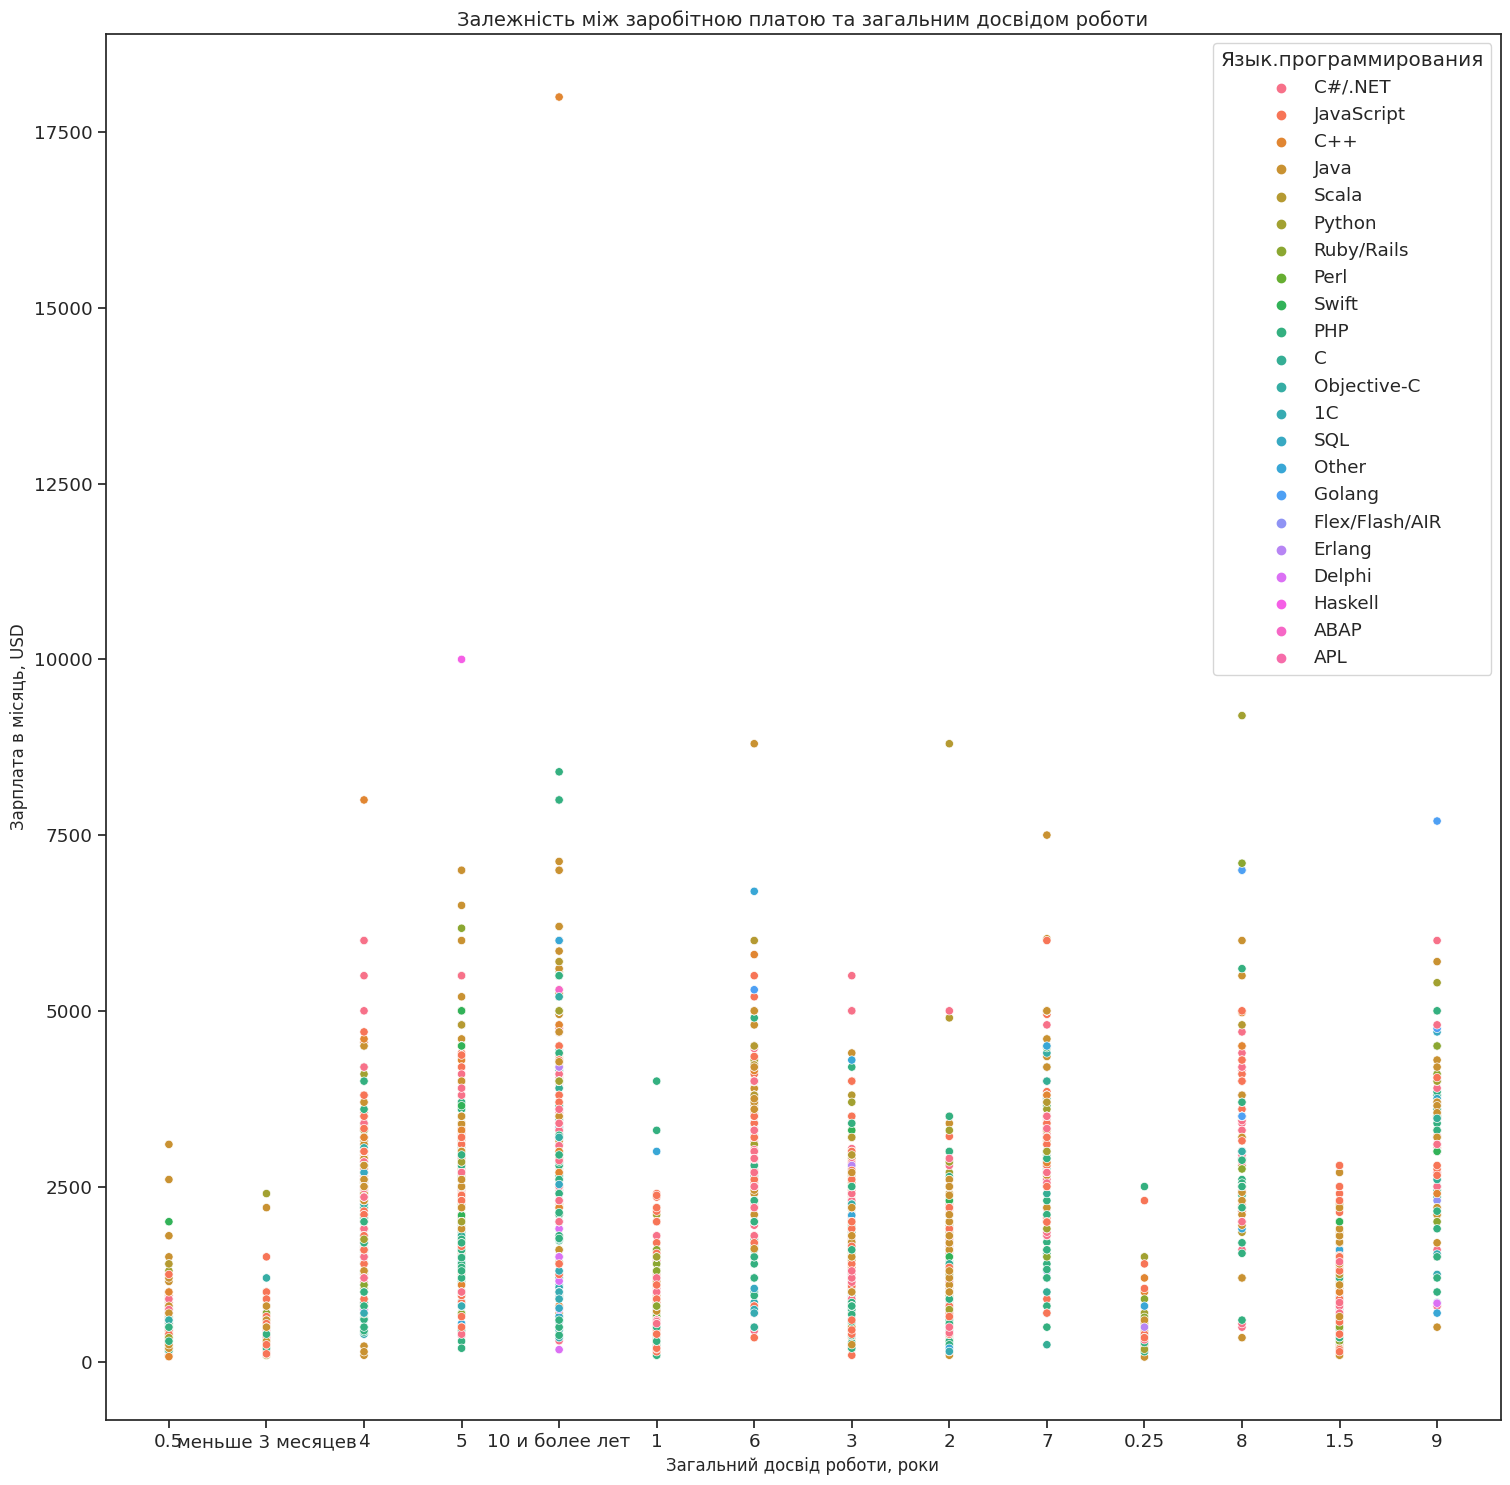

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(18,18))
sns.scatterplot(data=df, x='Общий.опыт.работы', y='Зарплата.в.месяц', hue='Язык.программирования')
plt.title('Залежність між заробітною платою та загальним досвідом роботи', fontsize=14)
plt.xlabel('Загальний досвід роботи, роки', fontsize=12)
plt.ylabel('Зарплата в місяць, USD', fontsize=12)
plt.show()



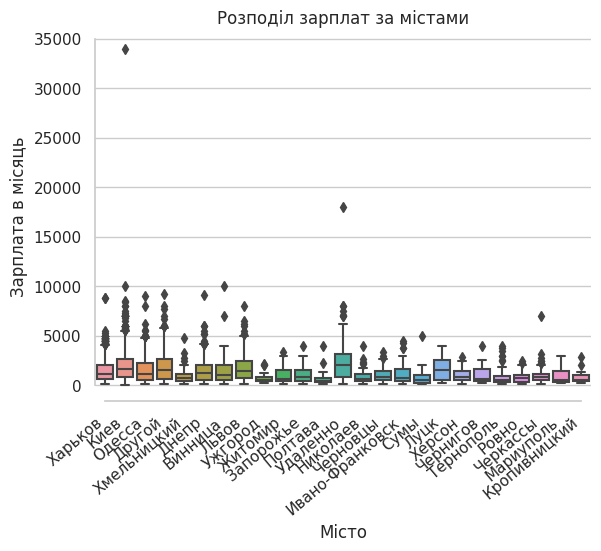

In [30]:
import seaborn as sns

sns.set(style="whitegrid")

ax = sns.boxplot(x="Город", y="Зарплата.в.месяц", data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
ax.set_xlabel('Місто')
ax.set_ylabel('Зарплата в місяць')
ax.set_title('Розподіл зарплат за містами')
sns.despine(trim=True)


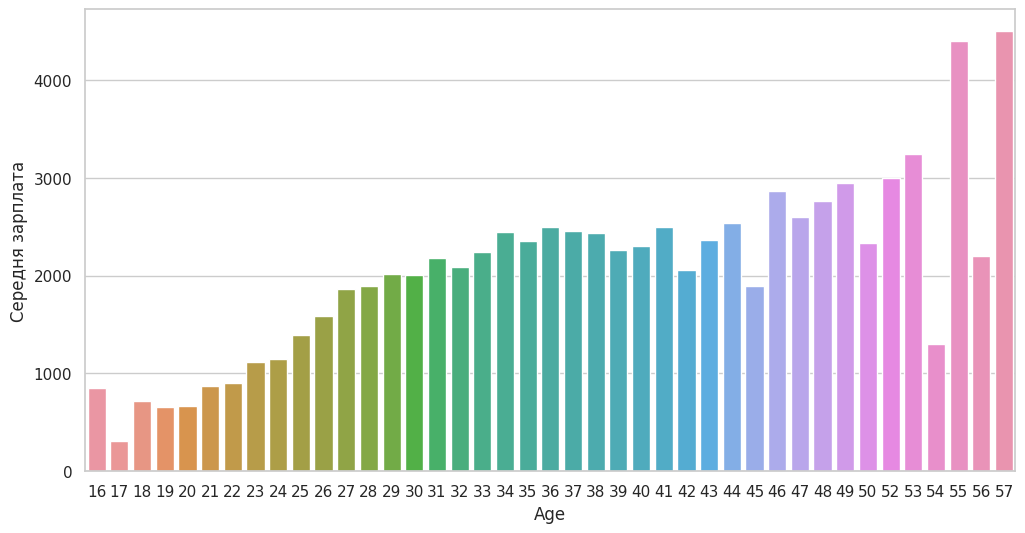

In [41]:
mean_salary_by_city = df.groupby('Возраст')['Зарплата.в.месяц'].mean()

fig, ax = plt.subplots(figsize=(12, 6))

di = sns.barplot(x=mean_salary_by_city.index, y=mean_salary_by_city.values, ax=ax)

plt.xlabel('Age')
plt.ylabel('Середня зарплата')

plt.show()

